# Generalidades de Procesamiento de Imágenes

Algunas librerías que utilizaremos:

* [Numpy](https://numpy.org/)
* [Matplotlib](https://matplotlib.org/stable/)
* [SimpleITK](https://simpleitk.org/)
* [Scipy](https://scipy.org/)
* [Open CV](https://opencv.org/)
* [Skimage](https://scikit-image.org/)

## Introducción a imágenes digitales

### Set up

Primero instalamos en el entorno del Colab las librerias que vamos a utilizar y no están instaladas en el ambiente:

Luego importamos todas las librerías a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import cv2
from imageio import imread

Montamos el drive para acceder a las imágenes que vamos a utilizar:

In [2]:
# Para apagar warnings molestos que pueden arrojar algunas librerías
import warnings
warnings.filterwarnings("ignore")

### Imagen monocomática

Contruímos una imagen de niveles de grises con un rango que va desde 0 (negro) hasta 255 (blanco).


In [3]:
Imagen1 = np.random.randint(0, 255, size=(10, 10))
Imagen1

array([[159, 233, 181,  18, 111,  66,  45, 102, 231, 222],
       [ 12, 118, 157, 119, 141, 241,  86, 204, 228,  60],
       [140,  81, 235, 241,  63,  15, 108, 207, 215, 117],
       [234, 204,  90, 213,  39,   9, 211,  89,  90,  50],
       [142,  42,   4, 199, 133, 254,  57,  84, 117, 234],
       [117, 107, 177, 156,  61, 141,  23,  26, 106,  46],
       [ 92, 150, 148,  80, 113, 100,  62, 111, 220, 139],
       [234, 156,  80, 175, 226, 204,  45, 213,  11,  82],
       [163, 217, 169, 137, 113, 165,  33, 226,  82, 250],
       [212, 223,  42,  77, 201,  32,  75, 215, 133, 116]], dtype=int32)

> [pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

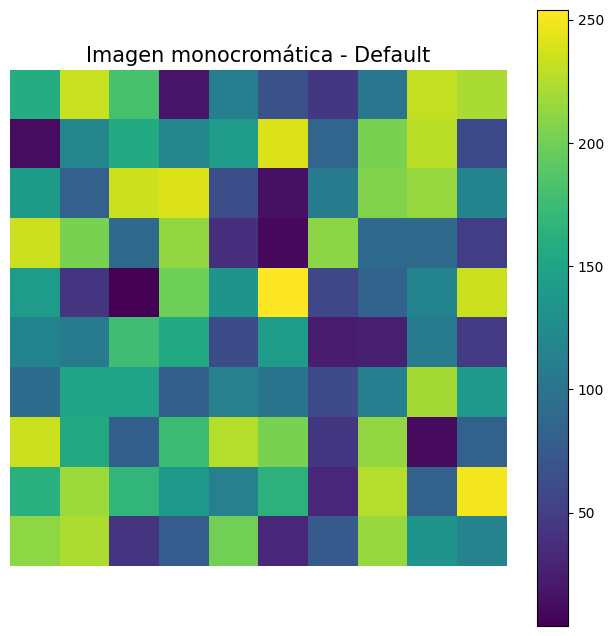

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(Imagen1)
plt.title("Imagen monocromática - Default", fontsize=15)
clb = plt.colorbar()
clb.set_label('',fontsize=13)
plt.axis("off")
plt.show()

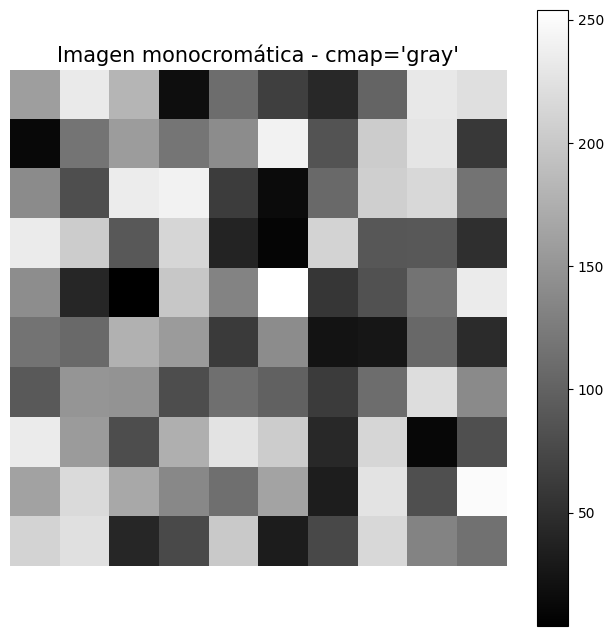

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(Imagen1, cmap='gray')
plt.title("Imagen monocromática - cmap='gray'",fontsize=15)
clb = plt.colorbar()
clb.set_label('',fontsize=13)
plt.axis("off")
plt.show()

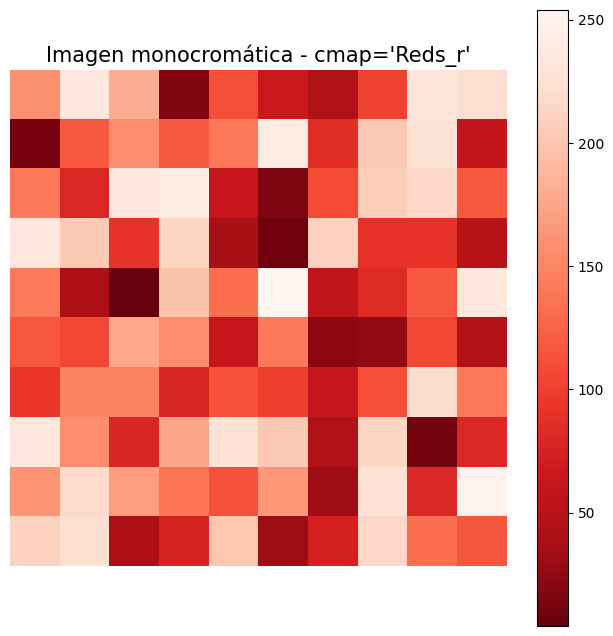

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(Imagen1, cmap="Reds_r")
plt.title("Imagen monocromática - cmap='Reds_r'",fontsize=15)
clb = plt.colorbar()
clb.set_label('',fontsize=13)
plt.axis("off")
plt.show()

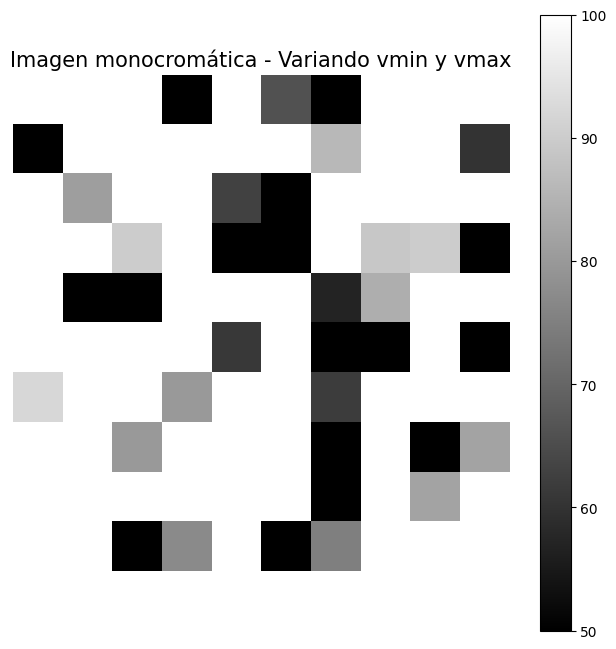

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(Imagen1, cmap="gray", vmin=50, vmax=100)
plt.title("Imagen monocromática - Variando vmin y vmax", fontsize=15)
clb = plt.colorbar()
clb.set_label('',fontsize=13)
plt.axis("off")
plt.show()

In [8]:
print(np.max(Imagen1))

254


In [9]:
im = imread('C:/Users/Juan Bautista/.vscode/PSIB/Mejoramiento/psib.png')

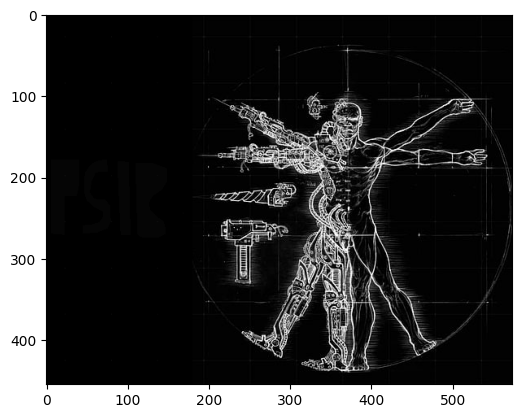

In [10]:
plt.imshow(im, cmap='gray')
plt.show()

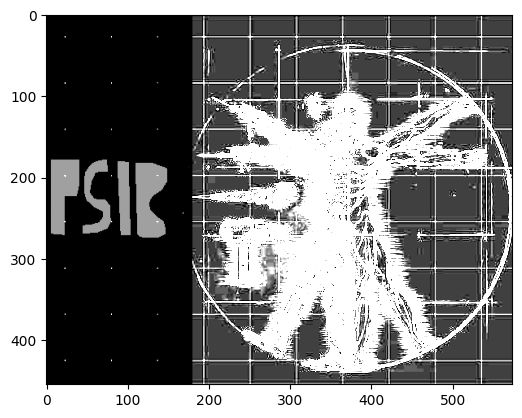

In [11]:
# Importancia de modificar el brightness/contrast
plt.imshow(im, cmap='gray', vmin=0, vmax=8)
plt.show()

Ahora trabajemos sobre dos [imagenes médicas](https://drive.google.com/drive/folders/1QrKsf7Ff0vq2UKPI0co9etHwQXD4Q_EC?usp=drive_link)

In [12]:
path1='C:/Users/Juan Bautista/.vscode/PSIB/Mejoramiento/img10.jpg'
path2='C:/Users/Juan Bautista/.vscode/PSIB/Mejoramiento/img24.png'

#### Simple ITK

Leeemos una imagen médica con la librería Simple ITK

In [13]:
img1 = sitk.ReadImage(path1)
print(type(img1))

<class 'SimpleITK.SimpleITK.Image'>


> Para conocer más sobre esta clase pueden ir a [la sección corrrespondiente de la documentación de ITK](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1Image.html)

Atributos y métodos de esta clase:

In [14]:
print(img1.GetSize())
print(img1.GetWidth())
print(img1.GetHeight())
print(img1.GetNumberOfPixels())

(128, 128)
128
128
16384


En realidad nos conviene trabajar sobre una estructura que mejor conocemos (`numpy.array`) así que convertimos a esta variable:

In [15]:
img1_array1 = sitk.GetArrayFromImage(img1)
img1_array1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
img1_array1[:50,:100]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 14,  0,  8],
       [ 0,  0,  0, ..., 20,  0,  2],
       [ 0,  0,  0, ..., 49,  0,  7]], dtype=uint8)

In [17]:
print(type(img1_array1))
print(img1_array1.shape)
print(img1_array1.dtype)

<class 'numpy.ndarray'>
(128, 128)
uint8


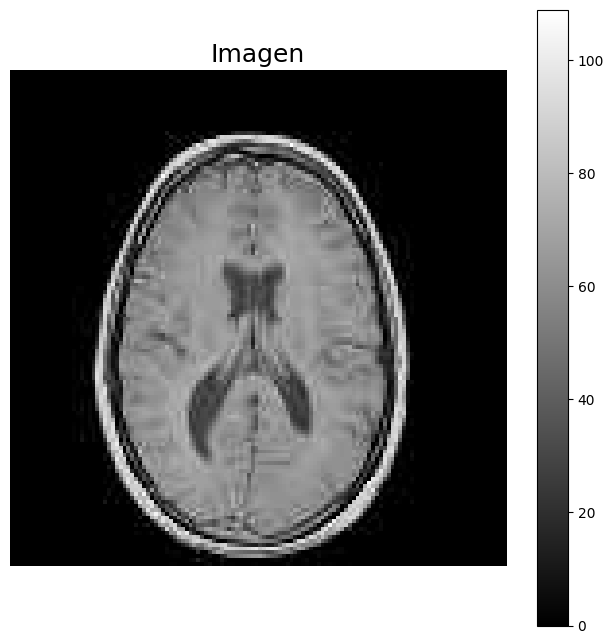

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(img1_array1, cmap="gray")
plt.title("Imagen",fontsize=18)
clb = plt.colorbar()
clb.set_label('',fontsize=15)
plt.axis(False)
plt.show()

In [19]:
print(np.max(img1_array1))
print(np.min(img1_array1))

109
0


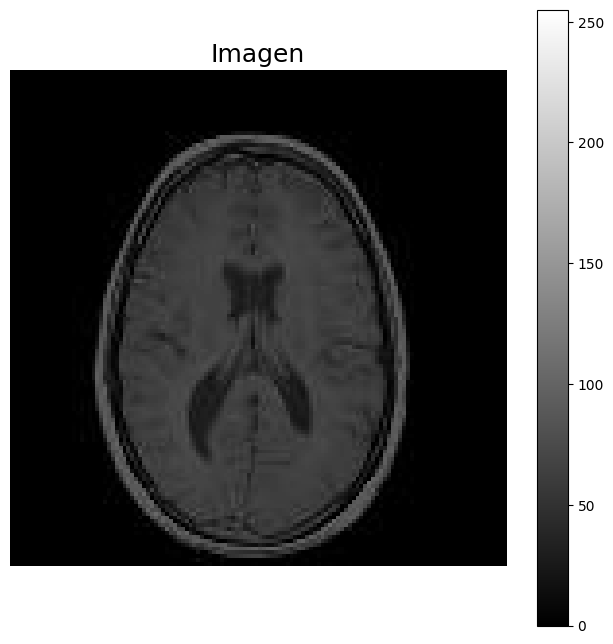

In [20]:
# Coloquemos la escala de grises en su totalidad (0,255)
plt.figure(figsize=(8,8))
plt.imshow(img1_array1, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen",fontsize=18)
clb = plt.colorbar()
clb.set_label('',fontsize=15)
plt.axis(False)
plt.show()

Se le puede realizar todas las operaciones matemáticas al igual que a una matriz de numpy de 2 dimensiones. Por otro lado, se pueden seleccionar filas y columnas, etc

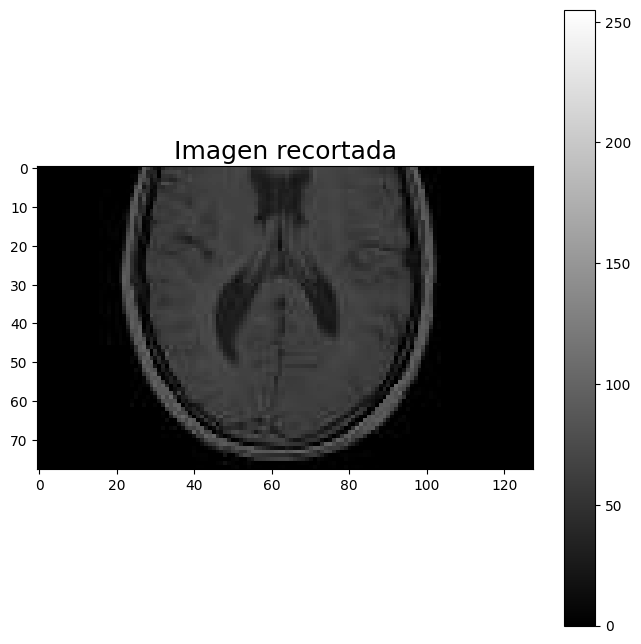

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(img1_array1[50:,:200], vmin=0,vmax=255, cmap="gray")
plt.title("Imagen recortada",fontsize=18)
clb = plt.colorbar()
clb.set_label('',fontsize=15)
plt.show()



```
imagen[filas, columnas]
imagen[recorte vertical, recorte horizontal]
```



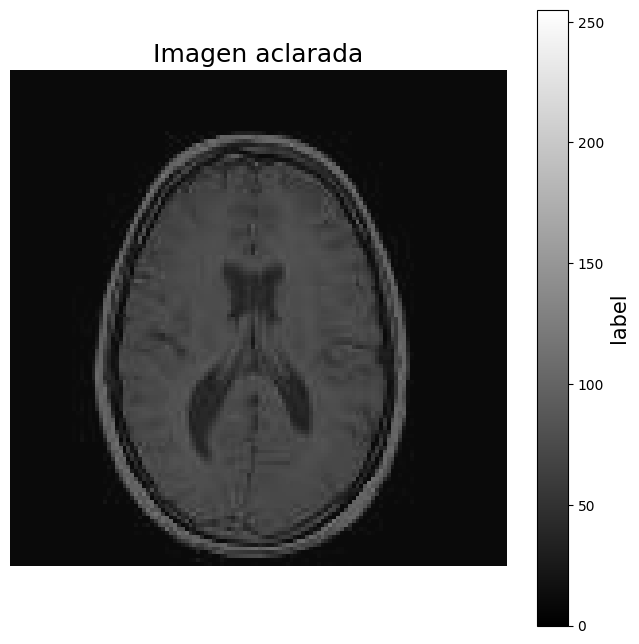

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(img1_array1+10, vmin=0,vmax=255, cmap="gray")
plt.title("Imagen aclarada",fontsize=18)
clb = plt.colorbar()
plt.axis(False)
clb.set_label('label',fontsize=15)
plt.show()

#### Open CV

Leeemos una imagen médica con la librería Open CV

In [23]:
img1_array2 = cv2.imread(path1,1)
print(img1_array2.shape)

(128, 128, 3)


In [24]:
img1_array2 = cv2.imread(path1,0)
print(img1_array2.shape)

(128, 128)


In [25]:
#¿Que está pasando? ¿Si no especifico el flag en que formato levanta la imagen?
img1_array2 = cv2.imread(path1)
print((img1_array2[:,:,0] == img1_array2[:,:,1]).all())
(img1_array2[:,:,0] == img1_array2[:,:,2]).all()

True


np.True_

In [26]:
print(type(img1_array2))

<class 'numpy.ndarray'>


> Para conocer más sobre esta clase pueden ir a [la sección corrrespondiente de la documentación de OpenCV](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gacbaa02cffc4ec2422dfa2e24412a99e2)

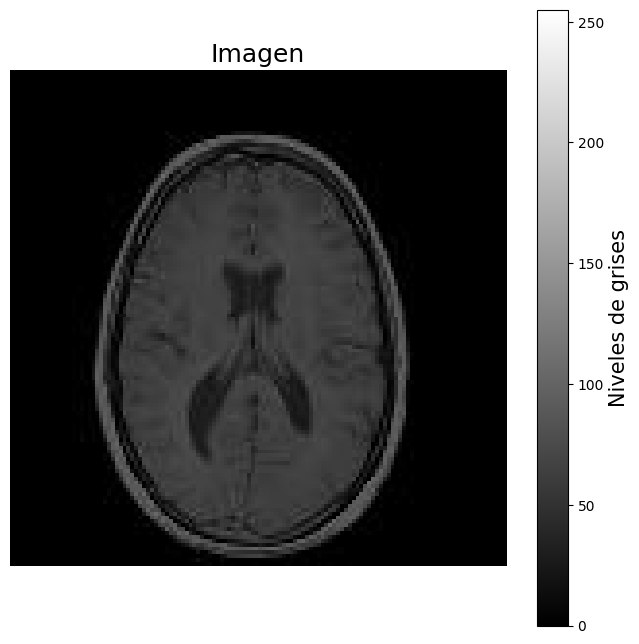

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(img1_array2, vmin=0, vmax=255, cmap="gray")
plt.title("Imagen",fontsize=18)
clb = plt.colorbar()
clb.set_label('Niveles de grises',fontsize=15)
plt.axis(False)
plt.show()

### Imagen a color

RGB (Red, Green, Blue)

In [28]:
img_rgb = np.zeros((5,5,3),np.uint8)
img_rgb.shape

(5, 5, 3)

In [29]:
img_rgb

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

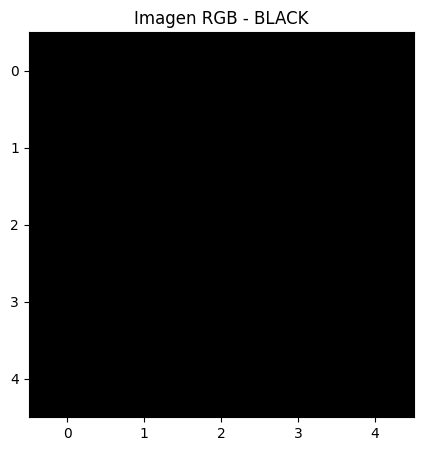

In [30]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img_rgb, vmin=0, vmax=255)
ax.set_title('Imagen RGB - BLACK',fontsize=12)
plt.show()

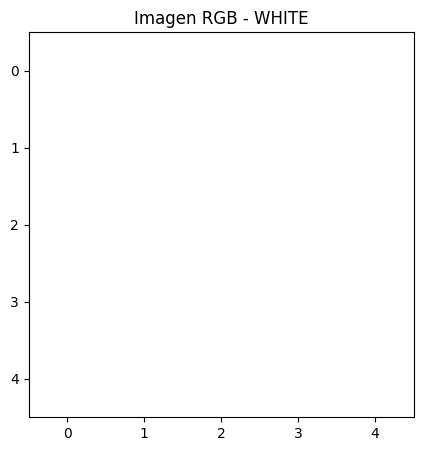

In [31]:
img_rgb = np.ones((5,5,3),np.uint8)*255
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img_rgb, vmin=0, vmax=255)
ax.set_title('Imagen RGB - WHITE',fontsize=12)
plt.show()

In [32]:
img_R = np.zeros((5,5,3),np.uint8)
#3 dimensiones, la tercera es un 3 por la capa R, G y B
img_R[:,:,0] = 255

img_G = np.zeros((5,5,3))
img_G[:,:,1] = 255

img_B = np.zeros((5,5,3))
img_B[:,:,2] = 255

img_magenta = np.zeros((5,5,3))
img_magenta[:,:,0] = img_magenta[:,:,2] = 255 # Magenta = R + B

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


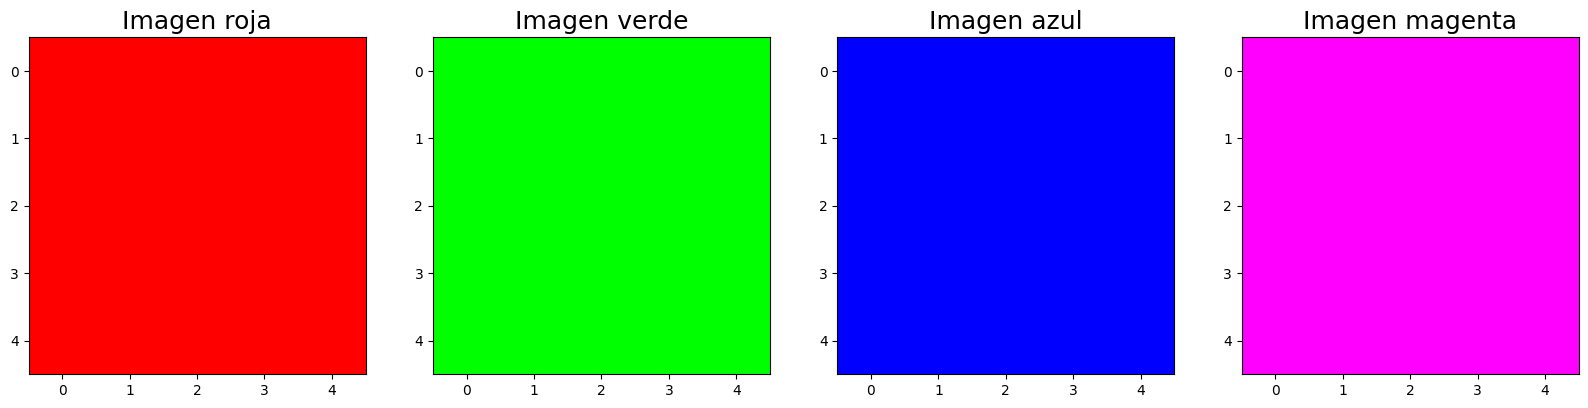

In [33]:
fig, ax = plt.subplots(1,4, figsize=(20,35))
f = 18
ax[0].imshow(img_R, vmin=0, vmax=255)
ax[0].set_title('Imagen roja',fontsize=f)

ax[1].imshow(img_G, vmin=0, vmax=255)
ax[1].set_title('Imagen verde',fontsize=f)

ax[2].imshow(img_B, vmin=0, vmax=255)
ax[2].set_title('Imagen azul',fontsize=f)

ax[3].imshow(img_magenta, vmin=0, vmax=255)
ax[3].set_title("Imagen magenta",fontsize=f)
plt.show()

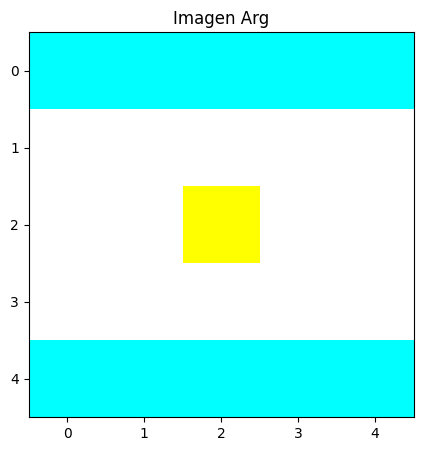

In [34]:
#img_rgb = np.zeros((5,5,3),np.uint8)
img_rgb = np.ones((5,5,3),np.uint8)* 255

celeste = [0, 255, 255]  # amarillo = G + B
img_rgb[0,:,:] = celeste

img_rgb[4,:,0] = 0

img_rgb[2,2,2] = 0 # amarillo = R + G

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img_rgb, vmin=0, vmax=255)
ax.set_title('Imagen Arg',fontsize=12)
plt.show()

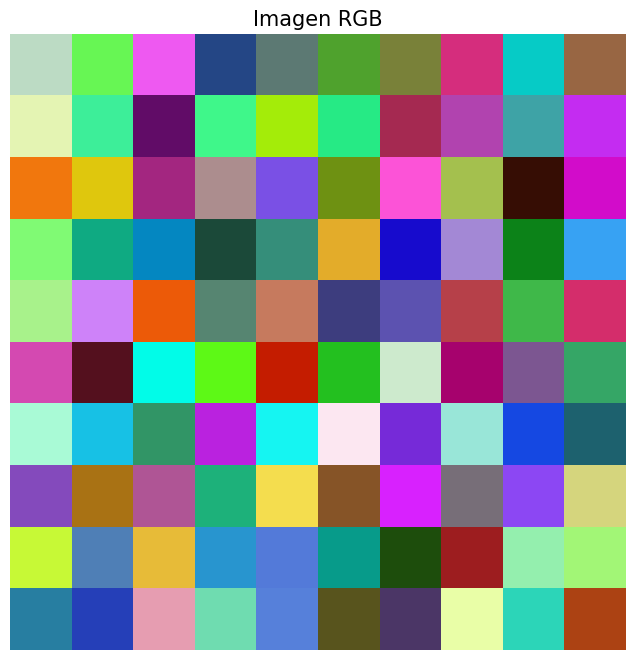

In [35]:
img2 = np.random.randint(0,255,size=(10,10,3))

plt.figure(figsize=(8,8))
plt.imshow(img2, vmin=0,vmax=255)
plt.title("Imagen RGB",fontsize=15)
plt.axis("off")
plt.show()

**Paleta de colores (RGB)**: https://htmlcolorcodes.com/es/

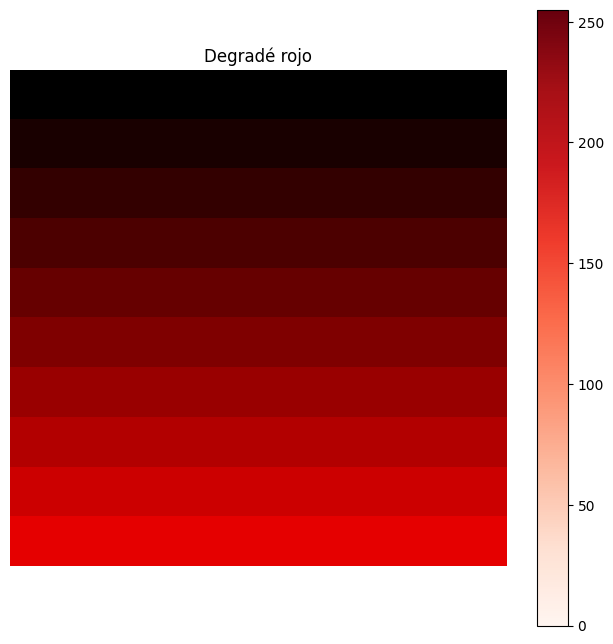

In [36]:
N = 10
img_degraderojo = np.zeros((N,10,3), np.uint8)

for i in range(img_degraderojo.shape[0]):
  img_degraderojo[i,:,0] = i/img_degraderojo.shape[0] * 255

plt.figure(figsize=(8,8))
plt.title("Degradé rojo")
plt.imshow(img_degraderojo, vmin=0, vmax=255, cmap='Reds')
clb = plt.colorbar()
clb.set_label('',fontsize=10)
plt.axis(False)
plt.show()

Ahora leamos una imagen médica a color con cv2

In [37]:
img2_1 = cv2.imread(path2, 1)
img2_1.shape

(200, 340, 3)

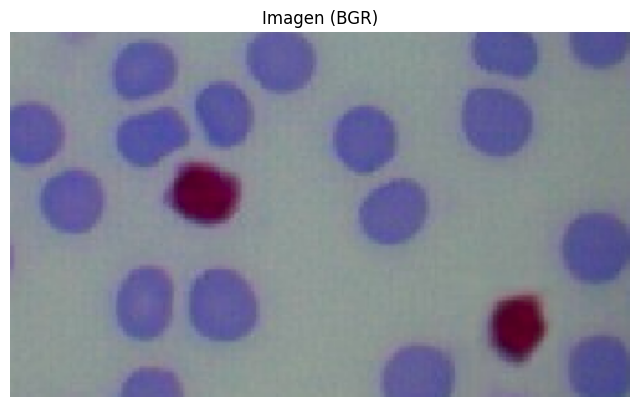

In [38]:
plt.figure(figsize=(8,5))
plt.title("Imagen (BGR)")
plt.imshow(img2_1, vmin=0, vmax=255)
plt.axis(False)
plt.show()

In [39]:
#La acomodamos a RGB
img2_2 = cv2.cvtColor(img2_1, cv2.COLOR_BGR2RGB)

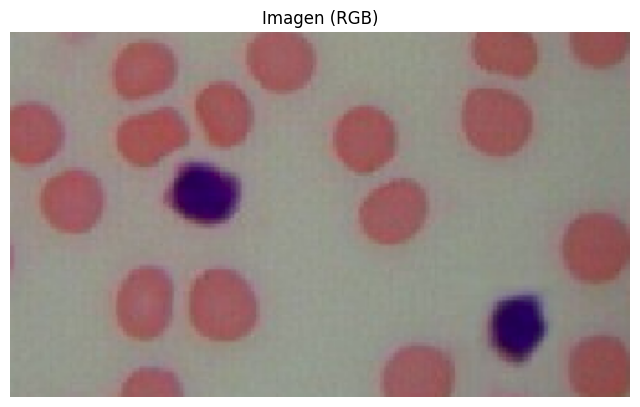

In [40]:
plt.figure(figsize=(8,5))
plt.title("Imagen (RGB)")
plt.imshow(img2_2, vmin=0, vmax=255)
plt.axis(False)
plt.show()

Visualizamos las distintas capas de color por sepado

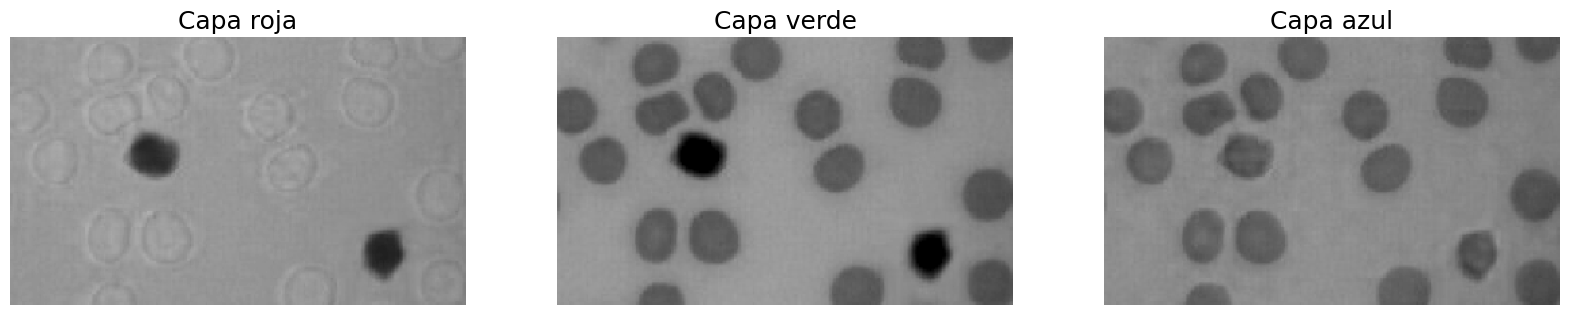

In [41]:
fig, ax = plt.subplots(1,3, figsize=(20,35))
f = 18
ax[0].imshow(img2_2[:,:,0], vmin=0, vmax=255, cmap="gray")
ax[0].set_title('Capa roja',fontsize=f)
ax[0].axis(False)

ax[1].imshow(img2_2[:,:,1], vmin=0, vmax=255, cmap="gray")
ax[1].set_title('Capa verde',fontsize=f)
ax[1].axis(False)

ax[2].imshow(img2_2[:,:,2], vmin=0, vmax=255, cmap="gray")
ax[2].set_title('Capa azul',fontsize=f)
ax[2].axis(False)
plt.show()

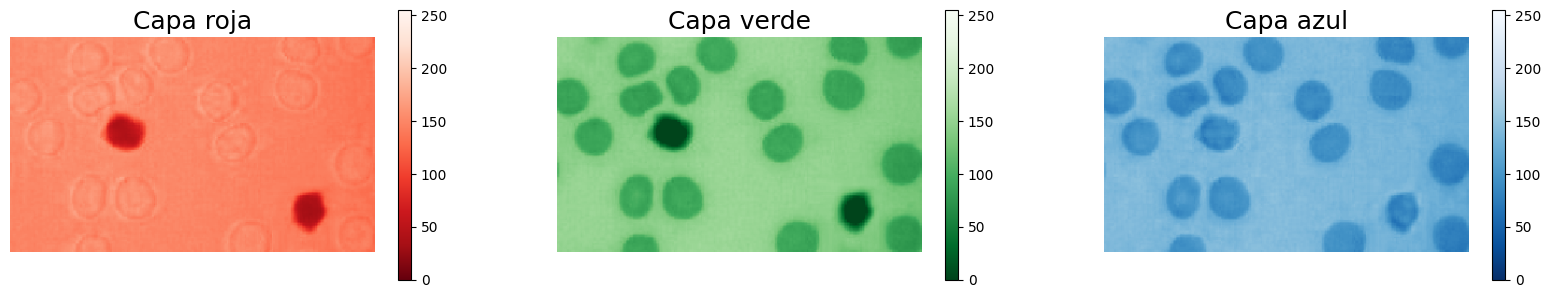

In [42]:
fig, ax = plt.subplots(1,3, figsize=(20,35))
f = 18

im_r = ax[0].imshow(img2_2[:,:,0], vmin=0, vmax=255, cmap="Reds_r")
ax[0].set_title('Capa roja',fontsize=f)
ax[0].axis(False)
cbar = fig.colorbar(im_r, ax=ax[0],shrink=0.1)

im_g = ax[1].imshow(img2_2[:,:,1], vmin=0, vmax=255, cmap="Greens_r")
ax[1].set_title('Capa verde',fontsize=f)
ax[1].axis(False)
cbar = fig.colorbar(im_g, ax=ax[1],shrink=0.1)

im_b = ax[2].imshow(img2_2[:,:,2], vmin=0, vmax=255, cmap="Blues_r")
ax[2].set_title('Capa azul',fontsize=f)
ax[2].axis(False)
cbar = fig.colorbar(im_b, ax=ax[2],shrink=0.1)
plt.show()

Pasamos la imagen a color a escala de grises

In [43]:
#Opción 1: Leer la imagen con cv2 y el segundo parámetro en 0
img_gray_1 = cv2.imread(path2, 0)
img_gray_1

array([[147, 147, 147, ...,  94,  97,  97],
       [150, 150, 148, ...,  94,  96,  96],
       [150, 150, 148, ...,  94,  96,  96],
       ...,
       [148, 148, 147, ..., 100, 108, 108],
       [146, 146, 145, ..., 107, 114, 114],
       [146, 146, 145, ..., 107, 114, 114]], dtype=uint8)

In [44]:
#Opción 2: Usamos la función cv2.rgb2gray
img_gray_2 = cv2.cvtColor(img2_2, cv2.COLOR_BGR2GRAY)
img_gray_2

array([[145, 145, 145, ...,  85,  90,  90],
       [149, 149, 147, ...,  85,  89,  89],
       [149, 149, 147, ...,  85,  89,  89],
       ...,
       [147, 147, 146, ...,  91, 100, 100],
       [145, 145, 144, ...,  99, 107, 107],
       [145, 145, 144, ...,  99, 107, 107]], dtype=uint8)

## EJERCITACIÓN

### 1. Recorrer "img10.jpg" mediante dos ciclos `for`

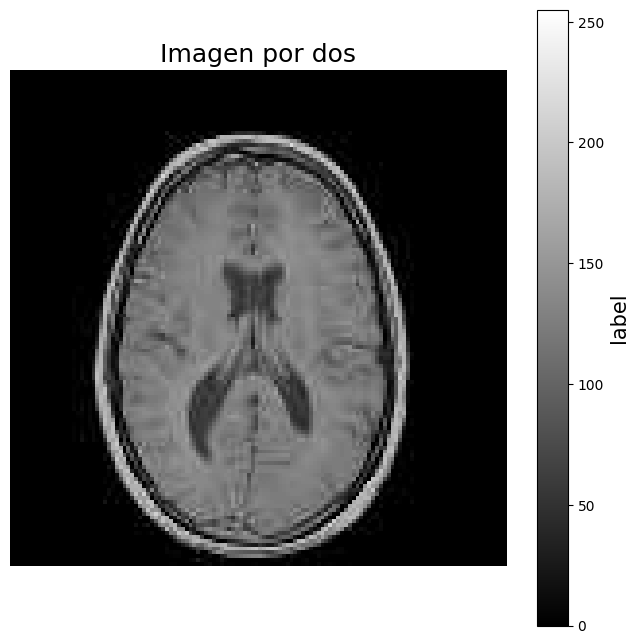

In [45]:
for i in range(len(img1_array1)):
    for j in range(len(img1_array1[i])):
        img1_array1[i][j] = img1_array1[i][j]*2
plt.figure(figsize=(8,8))
plt.imshow(img1_array1, vmin=0,vmax=255, cmap="gray")
plt.title("Imagen por dos",fontsize=18)
clb = plt.colorbar()
plt.axis(False)
clb.set_label('label',fontsize=15)
plt.show()

### 2.   Crear un tablero de ajedrez de 10x10

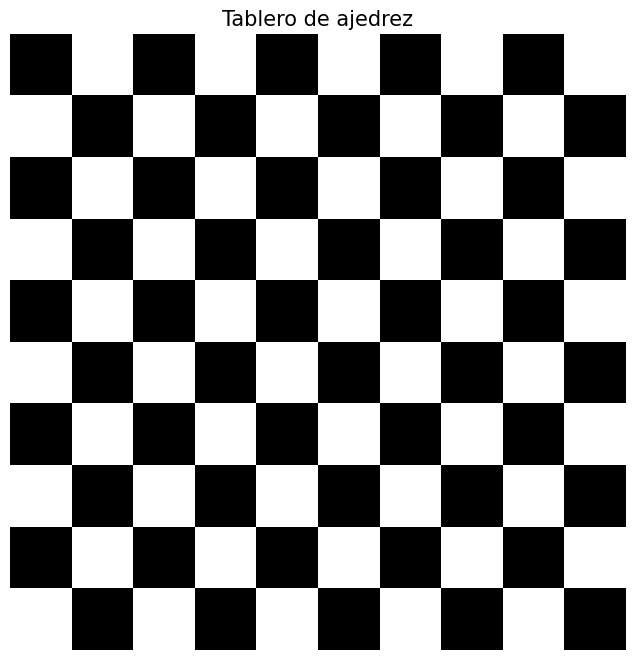

In [46]:
Tablero = np.zeros((10,10))
for i in range(10):
    if i%2 == 0:
        for j in range(1,10,2):
            Tablero[i][j] = 255
    elif i%2 != 0:
        for j in range(0,10,2):
            Tablero[i][j] = 255
plt.figure(figsize=(8,8))
plt.imshow(Tablero, cmap='gray')
plt.title("Tablero de ajedrez",fontsize=15)
plt.axis("off")
plt.show()

### 3. Crear un degrade vertical de color azul de tamaño 10x10


In [47]:
degrade = np.zeros((255,255))
for i in range(255):
    for j in range(255):
        degrade[i][j] = i

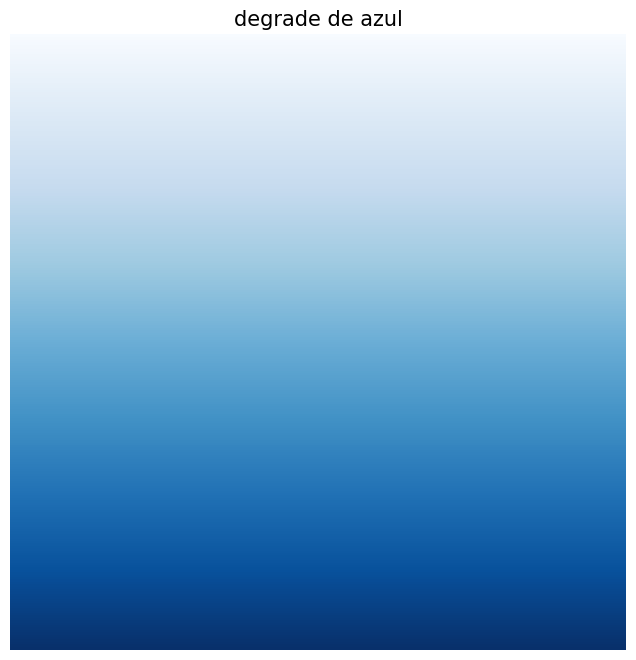

In [48]:
plt.figure(figsize=(8,8))
plt.imshow(degrade, cmap="Blues")
plt.title("degrade de azul",fontsize=15)
plt.axis("off")
plt.show()

### 4.   Crear una imagen negra con una cruz amarilla central de dimensión 10x10

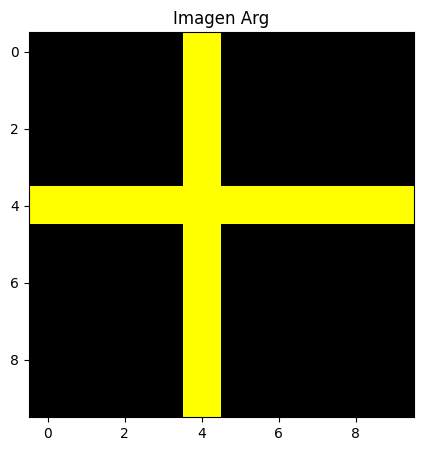

In [49]:
img_negra = np.zeros((10,10,3),np.uint8)
amarillo = [255,255,0]
img_negra[4] = amarillo
img_negra[:,4] = amarillo
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img_negra, vmin=0, vmax=255)
ax.set_title('Imagen Arg',fontsize=12)
plt.show()